# **Olympic Data Analysis 2024**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib
import plotly.express as px
import plotly.graph_objs as go

import warnings
warnings.filterwarnings("ignore")

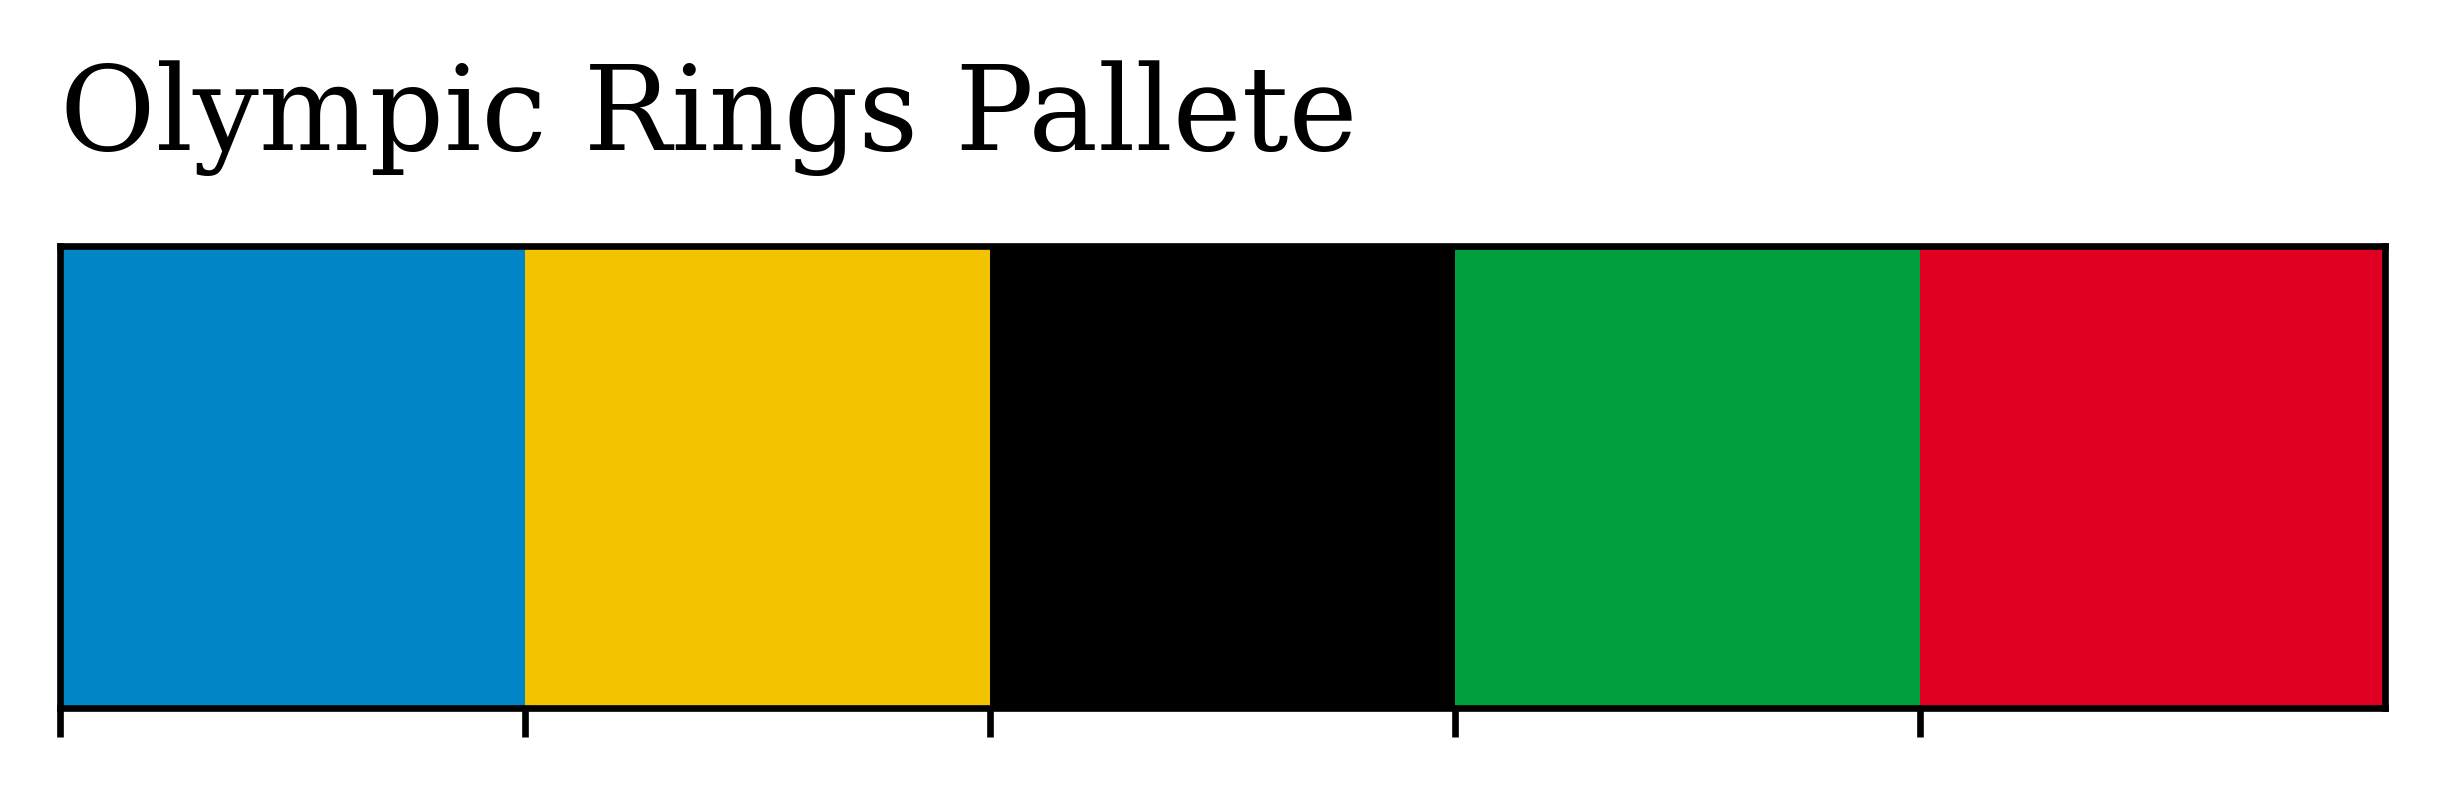

In [21]:
olympic_colors=['#0085C7', '#F4C300', '#000000', '#009F3D', '#DF0024']
#Blue,Yellow,Black,Green,Red
sns.palplot(olympic_colors)
plt.title("Olympic Rings Pallete",loc='left',fontfamily='serif',fontsize=14,y=1.1)
plt.show()

# 1. Analysis

## Athlete Demographics

### Height and Weight Analysis


In [5]:
athlete_df=pd.read_csv("/kaggle/input/summerolympics2024analysis/athletes.csv")
athlete_df.head()

,code,name,name_short,name_tv,gender,function,country_code,country,country_full,nationality,...,family,lang,coach,reason,hero,influence,philosophy,sporting_relatives,ritual,other_sports
0,1535420,VALENCIA Alejandra,VALENCIA A,Alejandra VALENCIA,Female,Athlete,MEX,Mexico,Mexico,Mexico,...,"Father, Francisco Ramon Valencia Fontes. Mothe...",Spanish,National/personal: Miguel Angel Flores (MEX),Grew up close to an archery range and was alwa...,NaN,NaN,NaN,NaN,NaN,NaN
1,1535429,RUIZ Angela,RUIZ A,Angela RUIZ,Female,Athlete,MEX,Mexico,Mexico,Mexico,...,Two brothers,"English, Spanish",National: Miguel Angel Flores (MEX).<br>Person...,She followed her brothers into archery,NaN,NaN,NaN,NaN,NaN,NaN
2,1535430,GRANDE Matias,GRANDE M,Matias GRANDE,Male,Athlete,MEX,Mexico,Mexico,Mexico,...,"Father, Nicolas",Spanish,National: David Alejandro Velez Sanchez (MEX),His father introduced him to the sport and the...,NaN,NaN,NaN,NaN,NaN,NaN
3,1536460,ROJAS Carlos,ROJAS C,Carlos ROJAS,Male,Athlete,MEX,Mexico,Mexico,Mexico,...,NaN,"German, Spanish",National: David Alejandro Velez Sanchez (MEX),He was inspired by the Disney animated movie R...,NaN,NaN,NaN,NaN,NaN,NaN
4,1536467,MARTINEZ WING Bruno,MARTINEZ WING B,Bruno MARTINEZ WING,Male,Athlete,MEX,Mexico,Mexico,Mexico,...,"Partner, Karla. One son (born October 2022)",Spanish,National: David Alejandro Velez Sanchez (MEX),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
athlete_df.columns

Index(['code', 'name', 'name_short', 'name_tv', 'gender', 'function',
       'country_code', 'country', 'country_full', 'nationality',
       'nationality_full', 'nationality_code', 'height', 'weight',
       'disciplines', 'events', 'birth_date', 'birth_place', 'birth_country',
       'residence_place', 'residence_country', 'nickname', 'hobbies',
       'occupation', 'education', 'family', 'lang', 'coach', 'reason', 'hero',
       'influence', 'philosophy', 'sporting_relatives', 'ritual',
       'other_sports'],
      dtype='object')

In [7]:
athlete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11115 entries, 0 to 11114
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   code                11115 non-null  int64  
 1   name                11115 non-null  object 
 2   name_short          11115 non-null  object 
 3   name_tv             11115 non-null  object 
 4   gender              11115 non-null  object 
 5   function            11115 non-null  object 
 6   country_code        11115 non-null  object 
 7   country             11115 non-null  object 
 8   country_full        11115 non-null  object 
 9   nationality         11098 non-null  object 
 10  nationality_full    11098 non-null  object 
 11  nationality_code    11098 non-null  object 
 12  height              11115 non-null  int64  
 13  weight              11099 non-null  float64
 14  disciplines         11115 non-null  object 
 15  events              11115 non-null  object 
 16  birt

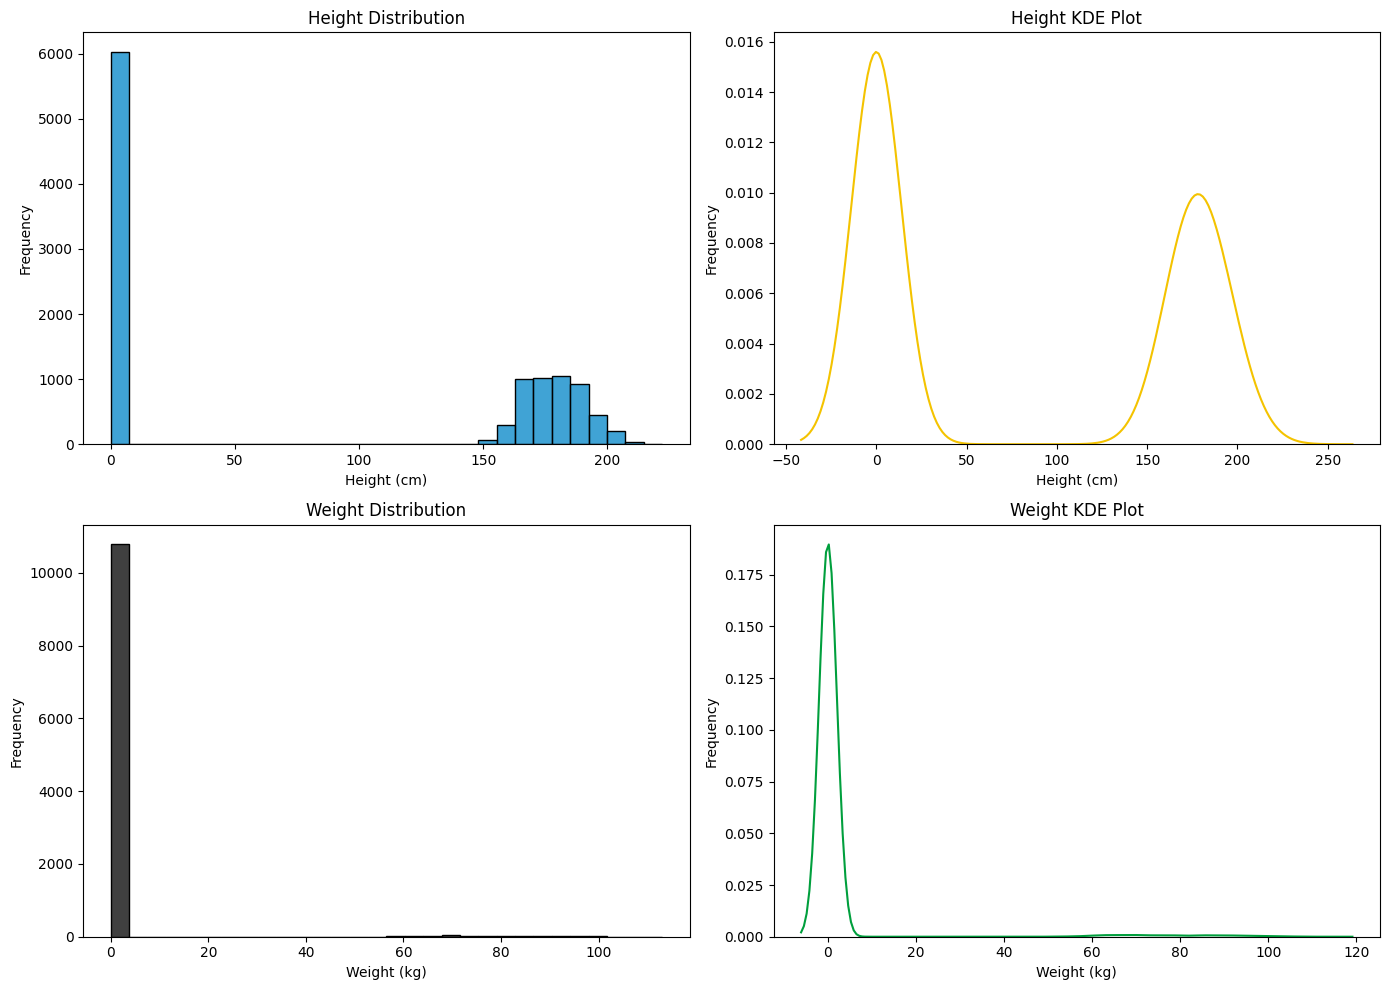

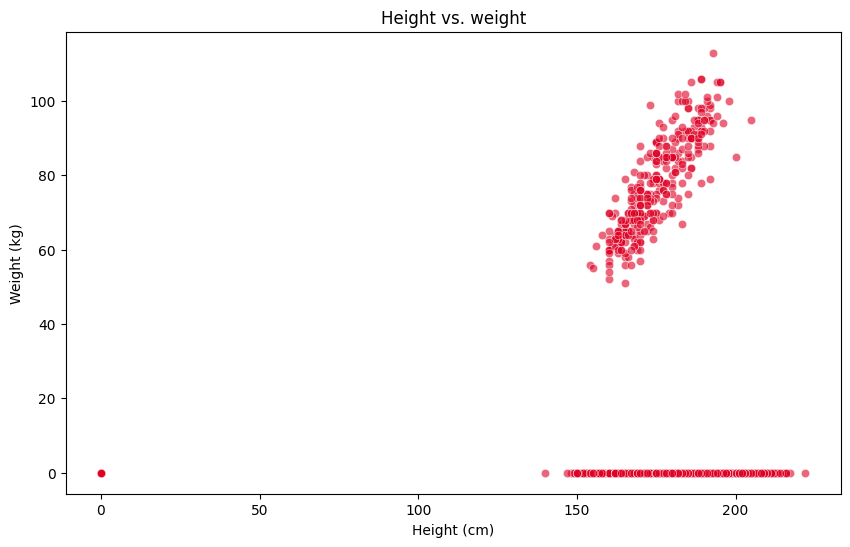

In [8]:
athlete_df = athlete_df.dropna(subset=['height', 'weight'])
# Set up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
# Histogram for height
sns.histplot(athlete_df['height'], bins=30, kde=False, ax=axs[0, 0], color=olympic_colors[0])
axs[0, 0].set_title('Height Distribution')
axs[0, 0].set_xlabel('Height (cm)')
axs[0, 0].set_ylabel('Frequency')


#KDE for wieght
sns.kdeplot(athlete_df['height'], ax=axs[0, 1], color=olympic_colors[1])
axs[0, 1].set_title('Height KDE Plot')
axs[0, 1].set_xlabel('Height (cm)')
axs[0, 1].set_ylabel('Frequency')


# Histogram for Weight
sns.histplot(athlete_df['weight'],bins=30,kde=False,ax=axs[1,0],color=olympic_colors[2])
axs[1,0].set_title('Weight Distribution')
axs[1,0].set_xlabel('Weight (kg)')
axs[1,0].set_ylabel('Frequency')


# KDE plot for Weight
sns.kdeplot(athlete_df['weight'],ax=axs[1,1],color=olympic_colors[3])
axs[1,1].set_title('Weight KDE Plot')
axs[1,1].set_xlabel('Weight (kg)')
axs[1,1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()


plt.figure(figsize=(10,6))
sns.scatterplot(data=athlete_df,x='height',y='weight',alpha=0.6,color=olympic_colors[4])
plt.title('Height vs. weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

## Age Distribution

In [9]:
athlete_df['birth_date'].head()

0    1994-10-17
1    2006-07-28
2    2004-04-26
3    2000-01-14
4    1998-03-08
Name: birth_date, dtype: object

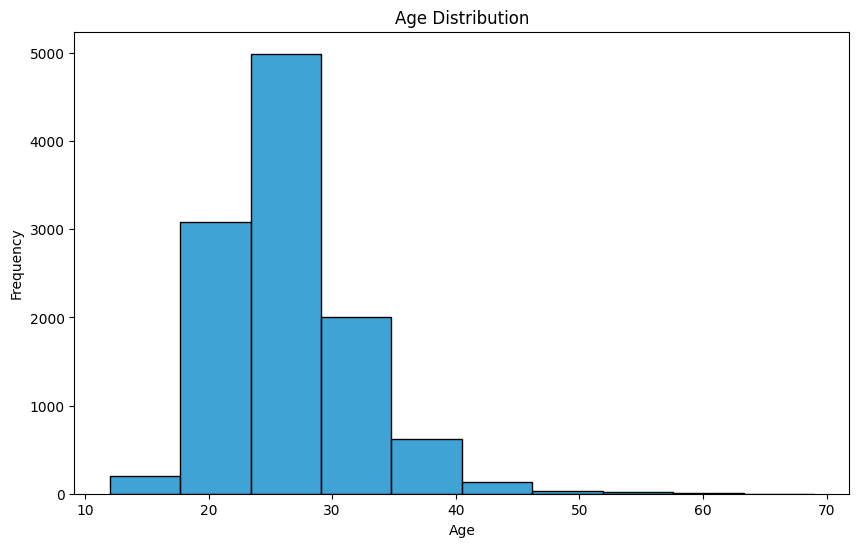

In [10]:
#convert birthdate to date and time
athlete_df['birth_date']=pd.to_datetime(athlete_df['birth_date'])

#calculate age of athlete
def calculate_Age(birth_date):
    today=datetime.today()
    age=today.year - birth_date.year - ((today.month,today.day)<(birth_date.month,birth_date.day))
    return age

athlete_df['age']=athlete_df['birth_date'].apply(calculate_Age)


#plotting age distribution
plt.figure(figsize=(10,6))
sns.histplot(athlete_df['age'],bins=10,kde=False,color=olympic_colors[0])
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


## Countries by No. of Athletes

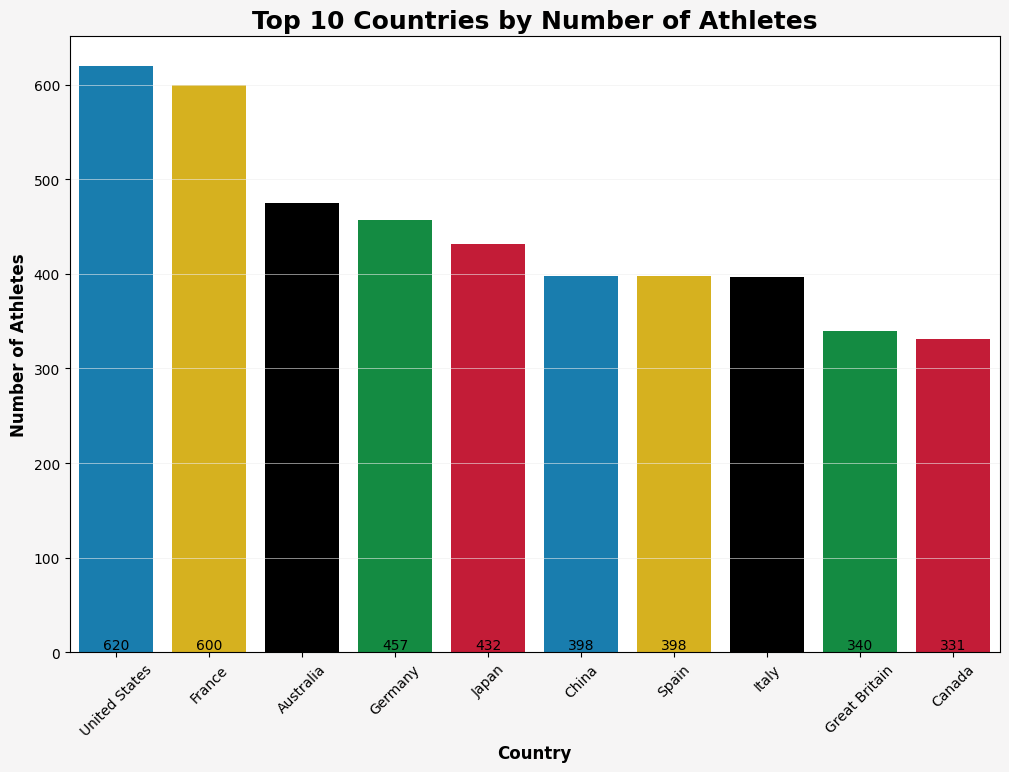

In [11]:
country_counts=athlete_df['country'].value_counts()
top_10_countries=country_counts.nlargest(10)
plt.figure(figsize=(12,8),facecolor='#f6f5f5')
ax=sns.barplot(x=top_10_countries.index,y=top_10_countries.values,palette=olympic_colors)
ax.set_title("Top 10 Countries by Number of Athletes",fontsize=18,weight='bold')
ax.set_xlabel('Country',fontsize=12,weight='bold')
ax.set_ylabel('Number of Athletes',fontsize=12,weight='bold')


ax.grid(which='major',axis='y', color='#EEEEEE',linewidth=0.4)

for p in ax.patches:
    value=f'{p.get_height():.0f}'
    x=p.get_x()+p.get_width()/2
    y=p.get_y()
    ax.text(x,y,value,ha='center',va='bottom',fontsize=10)
    
plt.xticks(rotation=45)
plt.show()    

## Gender Distribution

In [12]:
gender=athlete_df['gender']

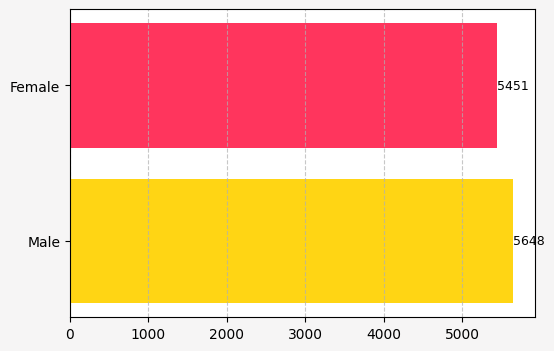

In [13]:
gender_counts=gender.value_counts()
plt.figure(figsize=(6,4),facecolor='#f6f5f5')

plt.barh(gender_counts.index,gender_counts.values,color=['#ffd514', '#ff355d'])

for index, value in enumerate(gender_counts.values):
    plt.text(value,index,f'{value}',va='center',fontsize=9,color='black')
    
plt.grid(axis='x',linestyle='--',alpha=0.7)
plt.show()

## Teams by Discipline

In [14]:
teams=pd.read_csv('/kaggle/input/summerolympics2024analysis/teams.csv')
discipline_counts=teams['discipline']

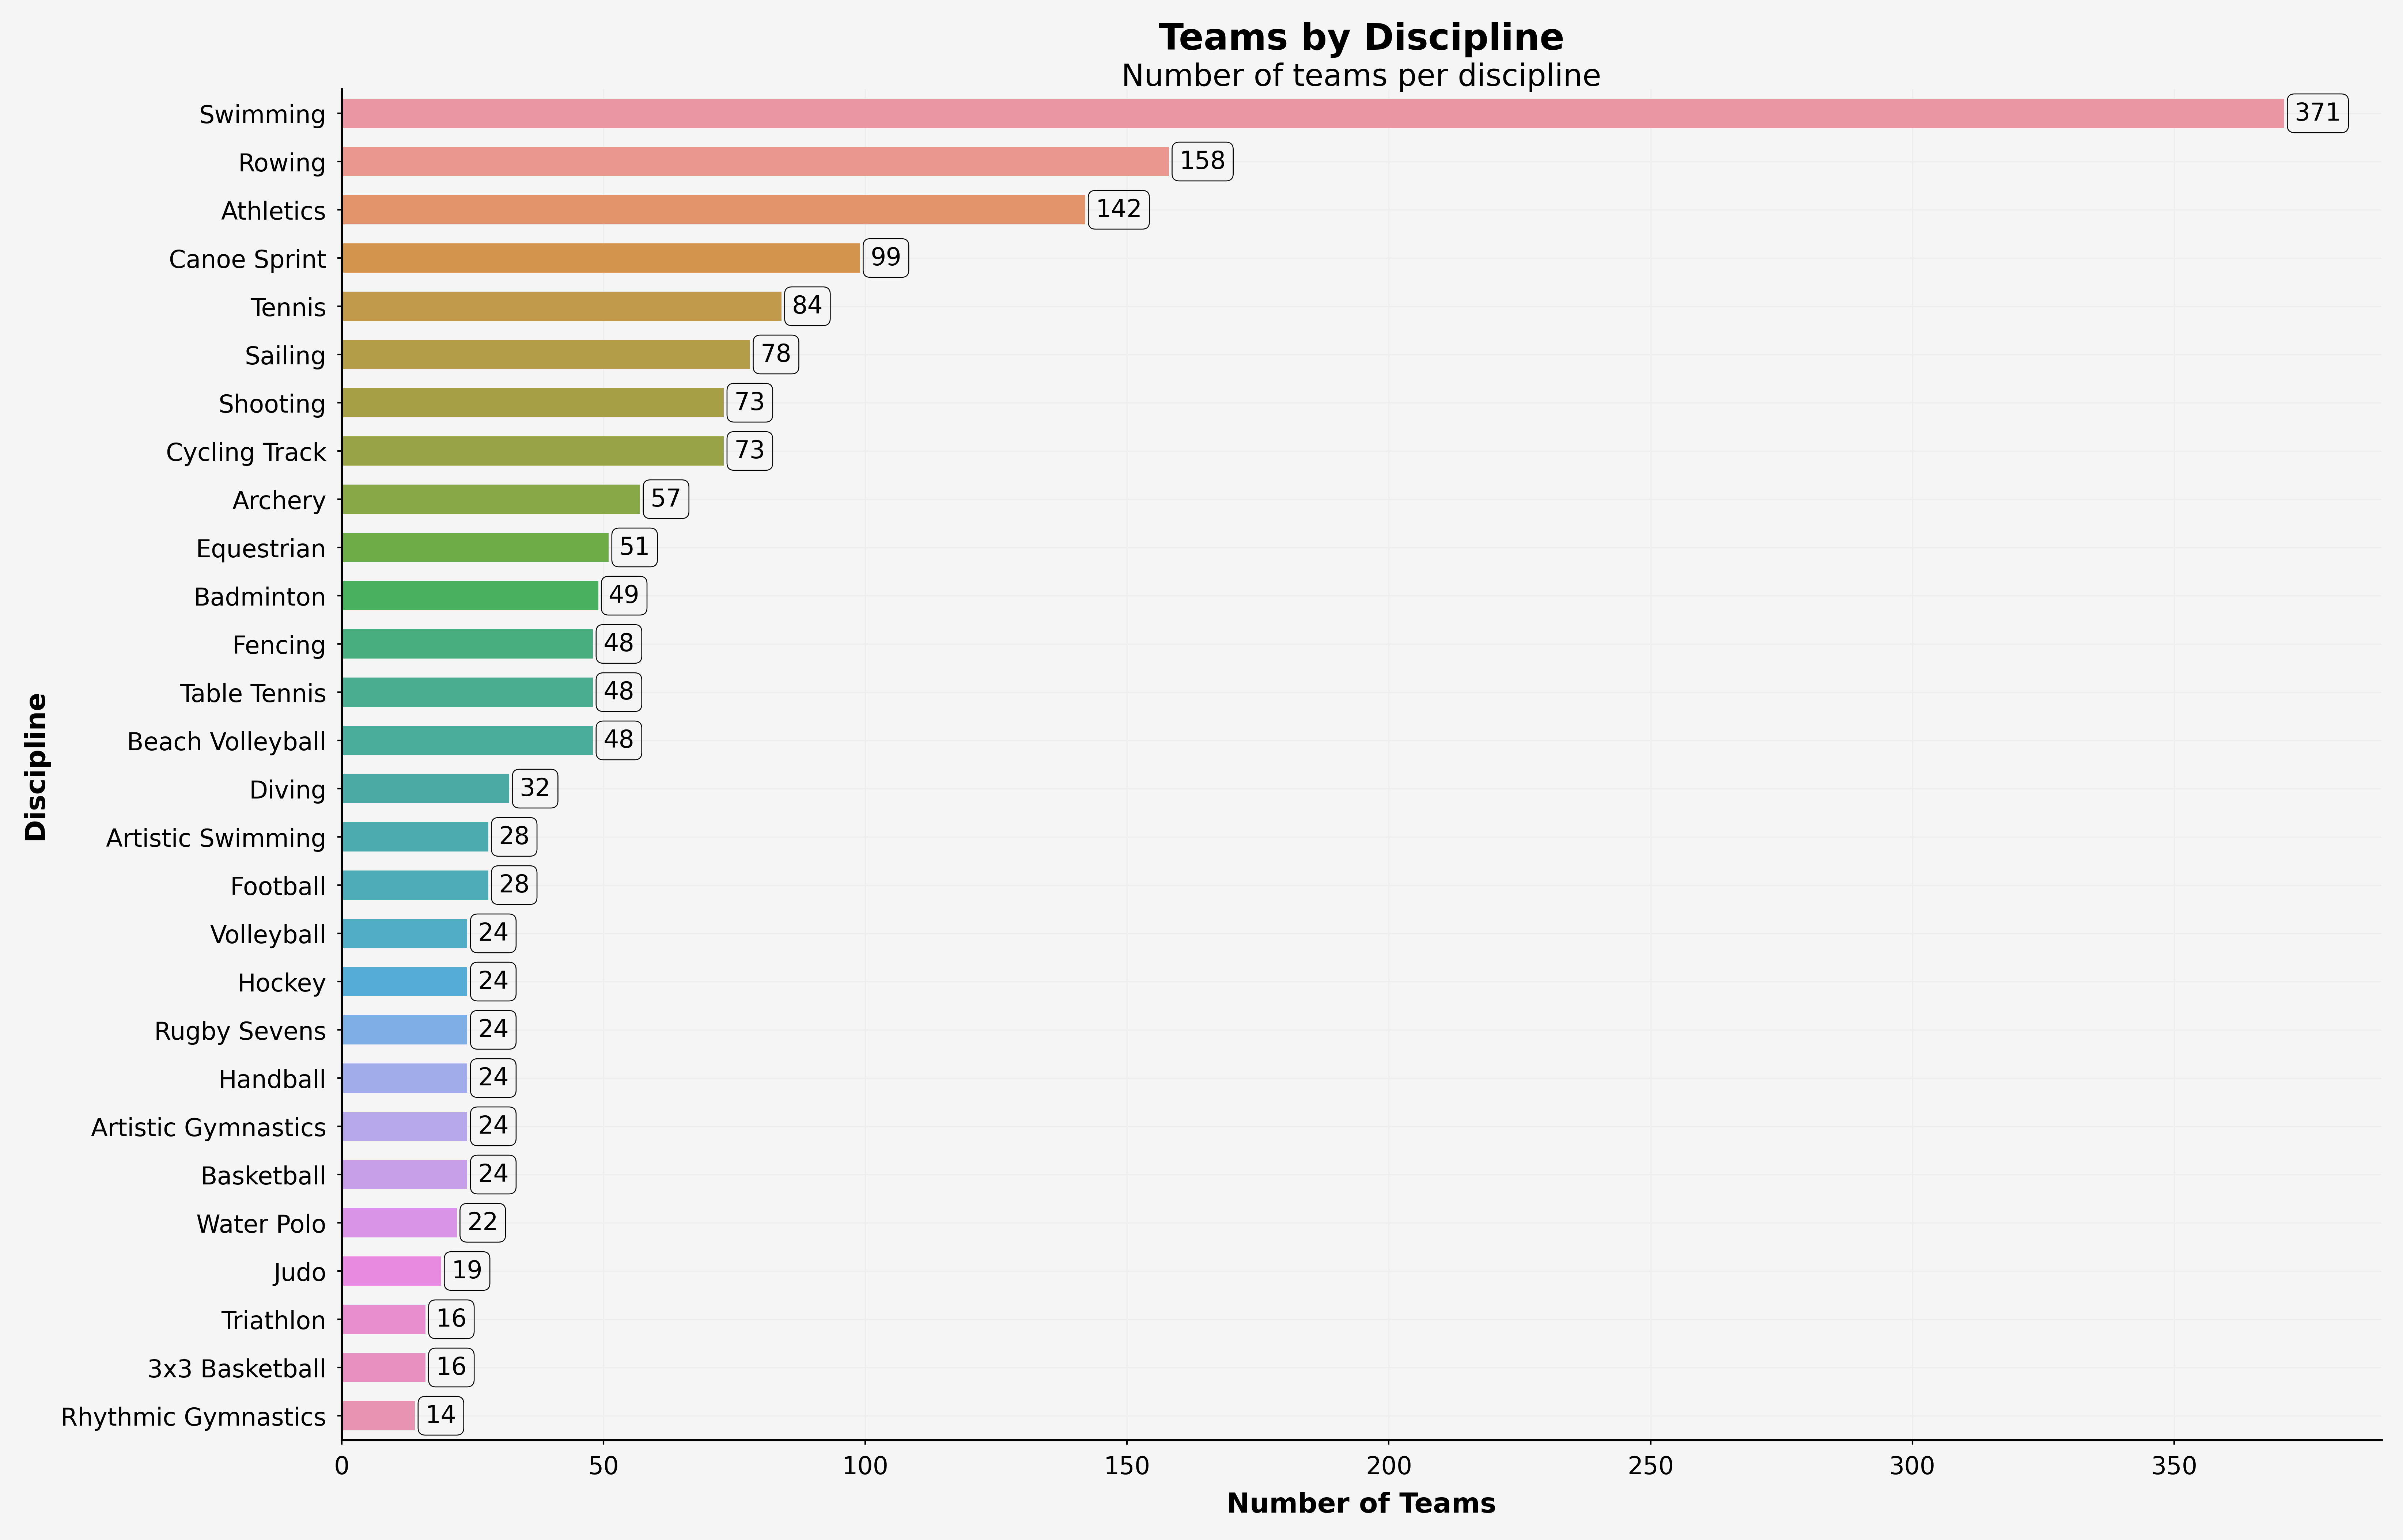

In [15]:
discipline_counts=teams['discipline'].value_counts()

#plot horizontalbar chart
plt.rcParams['figure.dpi']=600

fig=plt.figure(figsize=(12,8), facecolor='#f6f5f5')
gs=fig.add_gridspec(1,1)
gs.update(wspace=1.5,hspace=0.05)

background_color='#f6f5f5'

sns.set_palette(sns.color_palette([
    '#f5a300', '#d73c45', '#5c5b5b', '#009B77', '#F4A300',
    '#00A3E0', '#C8102E', '#E5E5E5', '#007A33', '#F9A11B'
]))

ax0=fig.add_subplot(gs[0,0])

for s in ['right','top']:
    ax0.spines[s].set_visible(False)
    
ax0.set_facecolor(background_color)

ax0_sns=sns.barplot(y=discipline_counts.index,x=discipline_counts.values,ax=ax0,zorder=2,width=0.6)
ax0_sns.set_xlabel("Number of Teams",fontsize=9,weight='bold')
ax0_sns.set_ylabel("Discipline",fontsize=9,weight='bold')

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)

ax0_sns.tick_params(labelsize=8,width=0.5,length=1.5)

for p in ax0_sns.patches:
    value=f'{p.get_width():.0f}'
    x=p.get_x()+p.get_width()+2
    y=p.get_y()+p.get_height()/2
    ax0.text(x,y,value,ha='left',va='center',fontsize=8,bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
ax0_sns.text(0.5,1.05,'Teams by Discipline',fontsize=12,weight='bold',ha='center',va='top',transform=ax0.transAxes)
ax0_sns.text(0.5,1.02,'Number of teams per discipline',fontsize=10,ha='center',va='top',transform=ax0.transAxes)
             
plt.show()

Medals Distribution

In [16]:
medals=pd.read_csv('/kaggle/input/summerolympics2024analysis/medals.csv')
medals.head()

,medal_type,medal_code,medal_date,name,country_code,gender,discipline,event,event_type,url_event,code
0,Gold Medal,1,2024-07-27,Remco EVENEPOEL,BEL,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1903136
1,Silver Medal,2,2024-07-27,Filippo GANNA,ITA,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1923520
2,Bronze Medal,3,2024-07-27,Wout van AERT,BEL,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1903147
3,Gold Medal,1,2024-07-27,Grace BROWN,AUS,W,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1940173
4,Silver Medal,2,2024-07-27,Anna HENDERSON,GBR,W,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1912525


In [17]:
medals.columns

Index(['medal_type', 'medal_code', 'medal_date', 'name', 'country_code',
       'gender', 'discipline', 'event', 'event_type', 'url_event', 'code'],
      dtype='object')

In [18]:
medal_counts = medals.pivot_table(index='country_code', columns='medal_type', aggfunc='size', fill_value=0)

# Plot the data
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(30, 12), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=1.5, hspace=0.05)
background_color = '#f6f5f5'
sns.set_palette(['#FFD700', '#C0C0C0', '#CD7F32'])

ax0 = fig.add_subplot(gs[0, 0])
for s in ['right', 'top']:
    ax0.spines[s].set_visible(False)

ax0.set_facecolor(background_color)

# Plotting the aggregated medal counts
medal_counts.plot(kind='bar', ax=ax0, zorder=2, width=0.8)
ax0.set_xlabel('Team Name', fontsize=10, weight='bold')
ax0.set_ylabel('Medals Count', fontsize=10, weight='bold')

ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.tick_params(labelsize=8, width=0.5, length=1.5)
ax0.legend(['Gold', 'Silver', 'Bronze'], ncol=3, facecolor='#D8D8D8', edgecolor=background_color, fontsize=8, bbox_to_anchor=(1.005, 1), loc='upper right')

# Annotate bars
for p in ax0.patches:
    value = f'{p.get_height():.0f}'
    if value == '0':
        pass
    else:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() + 1
        ax0.text(x, y, value, ha='center', va='bottom', fontsize=8)

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0.text(Xend, Yend + 0.05 * Yend, 'Medals Plot', fontsize=12, ha='right', weight='bold')
ax0.text(Xend, Yend, 'Medals as on 10th August', fontsize=10, ha='right')

plt.show()

In [19]:
# Reset the index to make it a column
medal_counts = medal_counts.reset_index()

# Sort the data
medals_data = medal_counts.set_index('country_code').sort_values(by=['Gold Medal', 'Silver Medal', 'Bronze Medal'], ascending=False)

# Create the figure
fig = go.Figure()

# Add traces for Gold, Silver, and Bronze medals
fig.add_trace(go.Bar(x=medals_data.index,
                    y=medals_data['Gold Medal'],
                    name='Gold',
                    marker_color='#FFD700'))

fig.add_trace(go.Bar(x=medals_data.index,
                    y=medals_data['Silver Medal'],
                    name='Silver',
                    marker_color='#C0C0C0'))

fig.add_trace(go.Bar(x=medals_data.index,
                    y=medals_data['Bronze Medal'],
                    name='Bronze',
                    marker_color='#CD7F32'))

# Update layout for better visualization
fig.update_layout(
    barmode='stack',
    xaxis_title='Team Name',
    yaxis_title='Medals Count',
    title='Medals Plot',
    plot_bgcolor='#f6f5f5',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    ),
    font=dict(size=14)
)

# Add annotations to the bars
for ids, country in enumerate(medals_data.index):
    for medal, color in zip(['Gold Medal', 'Silver Medal', 'Bronze Medal'], ['#FFD700', '#C0C0C0', '#CD7F32']):
        count = medals_data.at[country, medal]
        if count > 0:
            fig.add_annotation(
                x=country,
                y=sum(medals_data.loc[country, ['Gold Medal', 'Silver Medal', 'Bronze Medal']][medal_counts.columns.get_loc(medal):]),
                text=str(count),
                showarrow=False,
                font=dict(color='black', size=12),
                xanchor='center')

fig.show()

### Conclusion:

Data analysis of the 2024 Paris Olympics, exploring athlete demographics, performance metrics, and global participation trends. Visual insights include age distribution, gender representation, country-wise athlete counts, and medal tallies.